# Experiments_with_Basic_Example_RNN_Model

Trains models on synthetic data .

In [1]:
import sys
sys.path.append('../..')

In [2]:
import tensorflow as tf
from numpy import arange
import tensorflow_datasets as tfds
from numpy import minimum, maximum, ndarray
from model_compra_comigo.data_handler import DataHandler
import matplotlib.pyplot as plt


2023-07-01 16:09:07.088288: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 16:09:07.111886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 16:09:07.112641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 16:09:07.659841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from model_compra_comigo.data_handler import DataSimulator
from model_compra_comigo.data_handler import DataHandler

In [4]:
data_simulator = DataSimulator()
data_handler = DataHandler()


## Generate a Dataset

{"levelname": "WARNING", "asctime": "2023-07-01 16:09:08,770", "filename": "legend.py", "funcName": "_parse_legend_args", "lineno": 1323, "message": "No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument."}


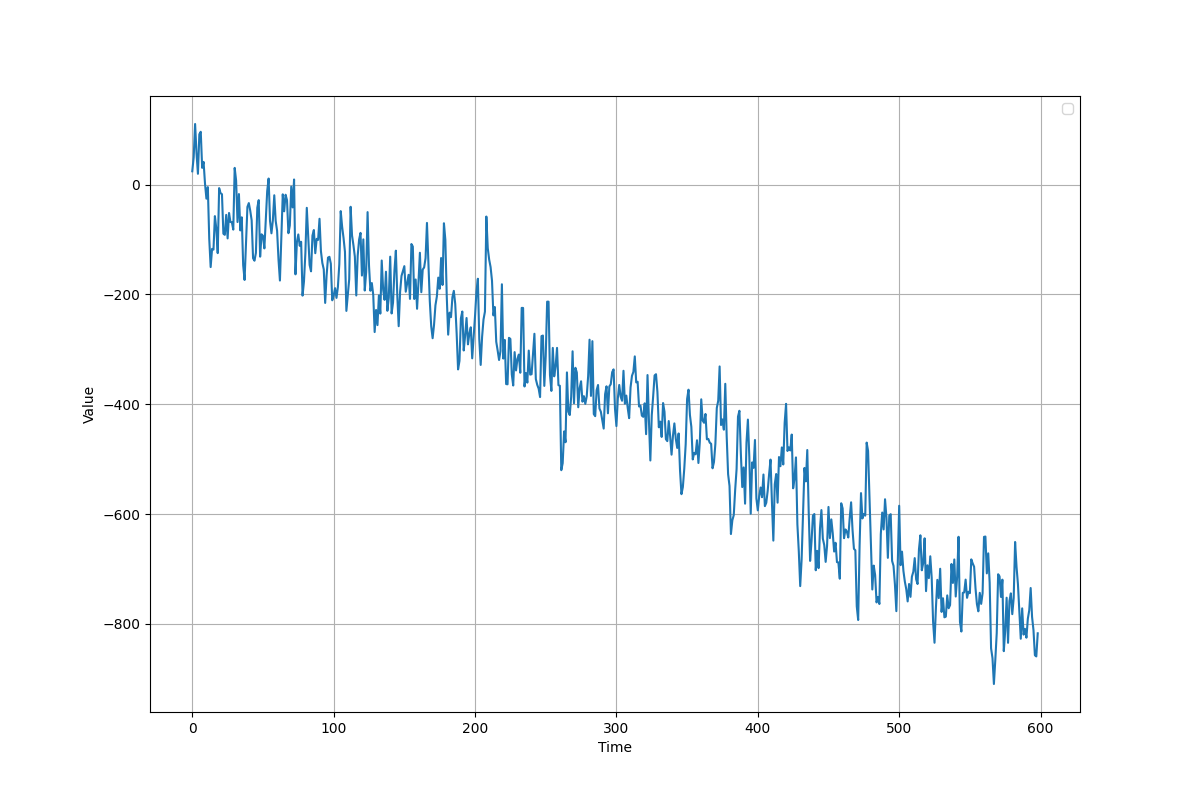

In [5]:
data_simulator = DataSimulator()
time_range = 600
time_data = arange(time_range)

series, parameters = data_simulator.generate(
    time_range = time_range,
)

labels=[(f"trend_slope = {parameters['trend_slope']}\n"
         f"seasonality_period = {parameters['seasonality_period']}\n"
         f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
         f"seasonality_phase = {parameters['seasonality_phase']}\n"
         f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
         f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
         f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
         f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
         f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
         f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
        )]

data_handler.plot_series(
    time=time_data,
    series=series,
    labels=labels
)


## RNNExample Experiment

In [19]:
window_size = 30
batch_size = 32
nforecast = 1
shuffle_buffer_size = 1000
epochs = 1000

split = 300

In [20]:
from model_compra_comigo.model import RNNExampleExperiment


In [21]:
rnne = RNNExampleExperiment()


In [22]:
nforecast

1

In [23]:
model = rnne.run(
    train_data = series[:split],
    test_data = series[split:],
    time_data = time_data,
    window_size = window_size,
    batch_size = batch_size,
    epochs = epochs,
    nforecast = nforecast,
)


2023/07/01 16:10:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-07-01 16:10:07.246979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-01 16:10:07.247872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/

Epoch 1/1000


2023-07-01 16:10:07.348114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-01 16:10:07.348943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-01 16:10:07.349557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 2s 14ms/step - loss: 492.9084 - mae: 493.4084
Epoch 2/1000
9/9 [==============================] - 0s 14ms/step - loss: 176.3656 - mae: 176.8648
Epoch 3/1000
9/9 [==============================] - 0s 13ms/step - loss: 126.0016 - mae: 126.5016
Epoch 4/1000
9/9 [==============================] - 0s 13ms/step - loss: 96.4545 - mae: 96.9524
Epoch 5/1000
9/9 [==============================] - 0s 14ms/step - loss: 92.5010 - mae: 92.9971
Epoch 6/1000
9/9 [==============================] - 0s 14ms/step - loss: 96.9974 - mae: 97.4967
Epoch 7/1000
9/9 [==============================] - 0s 13ms/step - loss: 99.8109 - mae: 100.3109
Epoch 8/1000
9/9 [==============================] - 0s 14ms/step - loss: 100.5647 - mae: 101.0647
Epoch 9/1000
9/9 [==============================] - 0s 14ms/step - loss: 100.4367 - mae: 100.9365
Epoch 10/1000
9/9 [==============================] - 0s 14ms/step - loss: 99.9991 - mae: 100.4991
Epoch 11/1000
9/9 [=====================

9/9 [==============================] - 0s 12ms/step - loss: 98.6191 - mae: 99.1159
Epoch 86/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.6191 - mae: 99.1159
Epoch 87/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 88/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 89/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 90/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 91/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 92/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 93/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 94/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.6191 - mae: 99.1159
Epoch 95/1000
9/9 [=========================

9/9 [==============================] - 0s 13ms/step - loss: 98.5927 - mae: 99.0896
Epoch 169/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5817 - mae: 99.0787
Epoch 170/1000
9/9 [==============================] - 0s 12ms/step - loss: 98.5821 - mae: 99.0788
Epoch 171/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5867 - mae: 99.0834
Epoch 172/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5912 - mae: 99.0879
Epoch 173/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5941 - mae: 99.0908
Epoch 174/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5953 - mae: 99.0920
Epoch 175/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5954 - mae: 99.0921
Epoch 176/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5950 - mae: 99.0917
Epoch 177/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5946 - mae: 99.0913
Epoch 178/1000
9/9 [===============

9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 252/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 253/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 254/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 255/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 256/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 257/1000
9/9 [==============================] - 0s 12ms/step - loss: 98.5820 - mae: 99.0787
Epoch 258/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 259/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 260/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5820 - mae: 99.0787
Epoch 261/1000
9/9 [===============

9/9 [==============================] - 0s 14ms/step - loss: 98.5594 - mae: 99.0560
Epoch 335/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5582 - mae: 99.0548
Epoch 336/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5572 - mae: 99.0538
Epoch 337/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5570 - mae: 99.0536
Epoch 338/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5573 - mae: 99.0539
Epoch 339/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5576 - mae: 99.0542
Epoch 340/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5578 - mae: 99.0544
Epoch 341/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5579 - mae: 99.0545
Epoch 342/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5579 - mae: 99.0545
Epoch 343/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5579 - mae: 99.0545
Epoch 344/1000
9/9 [===============

9/9 [==============================] - 0s 13ms/step - loss: 98.5460 - mae: 99.0426
Epoch 418/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5460 - mae: 99.0426
Epoch 419/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5460 - mae: 99.0426
Epoch 420/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5460 - mae: 99.0426
Epoch 421/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5460 - mae: 99.0426
Epoch 422/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5460 - mae: 99.0426
Epoch 423/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5460 - mae: 99.0426
Epoch 424/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5460 - mae: 99.0426
Epoch 425/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5460 - mae: 99.0426
Epoch 426/1000
9/9 [==============================] - 0s 12ms/step - loss: 98.5460 - mae: 99.0426
Epoch 427/1000
9/9 [===============

9/9 [==============================] - 0s 14ms/step - loss: 98.5342 - mae: 99.0308
Epoch 501/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5112 - mae: 99.0077
Epoch 502/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5248 - mae: 99.0214
Epoch 503/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5293 - mae: 99.0259
Epoch 504/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5287 - mae: 99.0253
Epoch 505/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5264 - mae: 99.0229
Epoch 506/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5242 - mae: 99.0207
Epoch 507/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5228 - mae: 99.0193
Epoch 508/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5222 - mae: 99.0187
Epoch 509/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5221 - mae: 99.0186
Epoch 510/1000
9/9 [===============

9/9 [==============================] - 0s 13ms/step - loss: 98.5111 - mae: 99.0075
Epoch 584/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5111 - mae: 99.0075
Epoch 585/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5111 - mae: 99.0075
Epoch 586/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5111 - mae: 99.0075
Epoch 587/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5111 - mae: 99.0075
Epoch 588/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5111 - mae: 99.0075
Epoch 589/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5111 - mae: 99.0075
Epoch 590/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.5111 - mae: 99.0075
Epoch 591/1000
9/9 [==============================] - 0s 12ms/step - loss: 98.5111 - mae: 99.0075
Epoch 592/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5111 - mae: 99.0075
Epoch 593/1000
9/9 [===============

9/9 [==============================] - 0s 13ms/step - loss: 98.4996 - mae: 98.9961
Epoch 667/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.5042 - mae: 99.0007
Epoch 668/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4874 - mae: 98.9843
Epoch 669/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4773 - mae: 98.9743
Epoch 670/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4772 - mae: 98.9739
Epoch 671/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4808 - mae: 98.9773
Epoch 672/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4848 - mae: 98.9812
Epoch 673/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4875 - mae: 98.9839
Epoch 674/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4888 - mae: 98.9852
Epoch 675/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4892 - mae: 98.9856
Epoch 676/1000
9/9 [===============

9/9 [==============================] - 0s 13ms/step - loss: 98.4772 - mae: 98.9735
Epoch 750/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4772 - mae: 98.9735
Epoch 751/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4772 - mae: 98.9735
Epoch 752/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4772 - mae: 98.9735
Epoch 753/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4772 - mae: 98.9735
Epoch 754/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4772 - mae: 98.9735
Epoch 755/1000
9/9 [==============================] - 0s 12ms/step - loss: 98.4772 - mae: 98.9735
Epoch 756/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4772 - mae: 98.9735
Epoch 757/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4772 - mae: 98.9735
Epoch 758/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4772 - mae: 98.9735
Epoch 759/1000
9/9 [===============

9/9 [==============================] - 0s 14ms/step - loss: 98.4661 - mae: 98.9624
Epoch 833/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4661 - mae: 98.9624
Epoch 834/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4565 - mae: 98.9528
Epoch 835/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4555 - mae: 98.9518
Epoch 836/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4545 - mae: 98.9509
Epoch 837/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4543 - mae: 98.9507
Epoch 838/1000
9/9 [==============================] - 0s 12ms/step - loss: 98.4546 - mae: 98.9509
Epoch 839/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4548 - mae: 98.9511
Epoch 840/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4550 - mae: 98.9513
Epoch 841/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4551 - mae: 98.9514
Epoch 842/1000
9/9 [===============

9/9 [==============================] - 0s 13ms/step - loss: 98.4443 - mae: 98.9406
Epoch 916/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4443 - mae: 98.9406
Epoch 917/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4443 - mae: 98.9406
Epoch 918/1000
9/9 [==============================] - 0s 12ms/step - loss: 98.4443 - mae: 98.9406
Epoch 919/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4443 - mae: 98.9406
Epoch 920/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4443 - mae: 98.9406
Epoch 921/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4443 - mae: 98.9406
Epoch 922/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4443 - mae: 98.9406
Epoch 923/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4443 - mae: 98.9406
Epoch 924/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4443 - mae: 98.9406
Epoch 925/1000
9/9 [===============

9/9 [==============================] - 0s 14ms/step - loss: 98.4335 - mae: 98.9299
Epoch 999/1000
9/9 [==============================] - 0s 14ms/step - loss: 98.4335 - mae: 98.9299
Epoch 1000/1000
9/9 [==============================] - 0s 13ms/step - loss: 98.4335 - mae: 98.9299


2023-07-01 16:12:18.250606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-01 16:12:18.251394: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-01 16:12:18.251986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-07-01 16:12:19.335422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-01 16:12:19.336201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-01 16:12:19.336798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-07-01 16:12:20.216055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-01 16:12:20.216847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-01 16:12:20.217434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

{"levelname": "WARNING", "asctime": "2023-07-01 16:12:20,965", "filename": "save.py", "funcName": "__init__", "lineno": 274, "message": "Found untraced functions such as _jit_compiled_convolution_op, _update_step_xla, lstm_cell_2_layer_call_fn, lstm_cell_2_layer_call_and_return_conditional_losses, lstm_cell_3_layer_call_fn while saving (showing 5 of 6). These functions will not be directly callable after loading."}


INFO:tensorflow:Assets written to: /tmp/tmpgvspcfdg/model/data/model/assets


{"levelname": "INFO", "asctime": "2023-07-01 16:12:21,440", "filename": "builder_impl.py", "funcName": "copy_assets_to_destination_dir", "lineno": 797, "message": "Assets written to: /tmp/tmpgvspcfdg/model/data/model/assets"}
2023-07-01 16:12:25.474013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-01 16:12:25.474952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]

1/1 [==============================] - 0s 11ms/step


2023-07-01 16:12:25.998393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-01 16:12:25.999225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-01 16:12:25.999815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - ETA: 0s

2023-07-01 16:12:26.214471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [300]
	 [[{{node Placeholder/_0}}]]
2023-07-01 16:12:26.214735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [300]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 11ms/step


In [24]:
model.get_summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 30, 64)            256       
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 20)                1300      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 67,625
Trainable params: 67,625
Non-trainable params: 0
_________________________________________________________________


In [25]:
data = data_handler.generate_windowed_data_forecast(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
)

In [14]:
plots = []

data = data_handler.generate_windowed_data_forecast(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
)

for i, example in enumerate(data):
    print(model.predict(example))
    print(i)
#     plot = DataHandler.plot_all(
#         series_lines = [
#             (time_data[maximum(0,index-gif_window):index+gif_window], series[maximum(0,index-gif_window):index+gif_window]),
#             (time_data[index:window_size+index], example.numpy()),
#         ],
#         series_points = [(time_data[index:window_size+index], forecast[i])],
#         labels_lines = ["series", "window"],
#         labels_points = ["forecast"],
#         xy_label = ["Time", "Value"],
#     )
#     plots.append(plot)
# plots[0]

1/1 [==============================] - 0s 20ms/step
[[-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]]
0
1/1 [==============================] - 0s 18ms/step
[[-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.3303

2023-07-01 16:09:44.584926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [600]
	 [[{{node Placeholder/_0}}]]
2023-07-01 16:09:44.585066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [600]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 17ms/step
[[-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]]
5
1/1 [==============================] - 0s 17ms/step
[[-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.33038]
 [-256.3303

In [15]:
pr = model.predict(example)

1/1 [==============================] - 0s 17ms/step


In [16]:
n = forecast.shape[0]
data = data_handler.generate_windowed_data_forecast(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
)
plots = []
for i, example in enumerate(data):
    for j in range(0, n):
        index = i*batch_size+j
        X = list(time_data[minimum(window_size+index, len(time_data)):minimum(window_size+nforecast+index, len(time_data))])
        if not X:
            X = [time_data[-1]+1]
        if len(X) < nforecast:
            X = X + list(range(X[-1]+1, X[-1]+nforecast+1-len(X)))
        plot = DataHandler.plot_all(
            series_lines = [
                (time_data[maximum(0,index-gif_window):index+gif_window], series[maximum(0,index-gif_window):index+gif_window]),
                (time_data[index:window_size+index], data_np[j][i]),
            ],
            series_points = [(X, forecast[j])],
            labels_lines = ["series", "window"],
            labels_points = ["forecast"],
            xy_label = ["Time", "Value"],
        )
        plots.append(plot)


NameError: name 'forecast' is not defined

In [ ]:
forecast = rnne.model.predict(data=example.numpy())


In [ ]:
for p, l in pl:
    print(p.numpy())

In [ ]:
pl = DataHandler.generate_windowed_dataset(
    data = series[:split],
    window_size = window_size,
    batch_size = batch_size,
    shuffle_buffer_size=shuffle_buffer_size,
    nforecast = nforecast,
    shuffle=True,
)

In [ ]:
series[split:].shape